**Name:** Javad Hezareh

**Student Number:** 98101074




# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [2]:
from sklearn.datasets import fetch_openml

# Using `fetch_openml`, download `Fashion-MNIST` 
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, cache=True)
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets. 
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
y = y.astype(np.int32)#.to_numpy()
X = X.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [4]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
x_train = x_train[np.isin(y_train, [0, 1, 7])]
y_train = y_train[np.isin(y_train, [0, 1, 7])]
#############################

print(x_train.shape, y_train.shape)

(18017, 784) (18017,)


In [5]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
x_test = x_test[np.isin(y_test, [0, 1, 7])]
y_test = y_test[np.isin(y_test, [0, 1, 7])]
#############################

print(x_test.shape, y_test.shape)

(2983, 784) (2983,)


## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [6]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, inp):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        exps = np.exp(inp)
        self.output = exps / exps.sum(axis=1)[:, None]
        #############################
        return self.output

    def backward(self, up_grad):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)
        grad = (self.output * up_grad) - (self.output * (up_grad * self.output).sum(axis=1)[:, None])
        #############################
        return grad

    def step(self, optimizer):
        pass

### The `Linear` Layer 

In [7]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)
        self.w = np.random.normal(size=(in_dim, out_dim), scale=np.sqrt(2/in_dim))
        self.b = np.zeros(out_dim)
        #############################
        self.dw = None
        self.db = None
        
    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        z = inp @ self.w + self.b[None, :]
        #############################
        return z
    
    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights 
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        self.db = up_grad.sum(axis=0)
        self.dw = self.inp.T @ up_grad
        self.dx = up_grad @ self.w.T
        down_grad = self.dx
        #############################
        return down_grad

    def step(self, optimizer):
        # Update the layer's weights and biases
        # Update previous_w_update and previous_b_update accordingly
        #############################
        # Your code goes here (5 points)
        self.w = optimizer.get_next_update(self.w, self.dw)
        self.b = optimizer.get_next_update(self.b, self.db)
        #############################

### The `ReLU` Layer

In [8]:
class RelU:
    def __init__(self):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        output = inp * (inp > 0)
        #############################
        return output
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad * (self.inp > 0)
        #############################
        return down_grad

    def step(self, optimizer):
        pass

### The `sigmoid` Layer

In [9]:
class Sigmoid:
    def __init__(self):
        self.inp = None
        self.output = None
        
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        self.inp = inp

        y = np.where(inp >= 0, 1 / (1 + np.exp(-inp)), np.exp(inp) / (1 + np.exp(inp)))
        self.output = y
        #############################
        return self.output
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        sigmoid = self.output
        down_grad = sigmoid * (1 - sigmoid) * up_grad
        #############################
        return down_grad
    
    def step(self, optimizer):
        pass

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [10]:
class CELoss():
    def __init__(self):
        pass

    def forward(self, pred, target):

        self.yhat = pred
        self.y = target
        m = self.y.shape[0]
        # Commpute and return the loss
        #############################
        # Your code goes here (8 points)
        loss = - np.log(np.where(target != 0, pred, 1)).sum()
        return loss / m
        #############################

    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        grad = - (1 / self.yhat) * self.y / self.y.shape[0]
        #############################
        return grad

## Optimizer

In this section, you'll implement an optimizer classes


In [11]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        new_x = x - self.lr * dx
        #############################
        return new_x

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [12]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
        self.layers = layers 
        self.losses  = [] 
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        out = inp
        for layer in self.layers:
            out = layer.forward(out)
        #############################
        return out
        
    def loss(self, pred, label):
        assert pred.shape == label.shape
        
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and 
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        up_grad = self.loss_fn.backward()
        for layer in self.layers[::-1]:
            up_grad = layer.backward(up_grad)
        #############################
        
    def update(self):
        for layer in self.layers:
          layer.step(self.optimizer)

The following cell encodes training labels into a one-hot representation with 3 classes.

In [13]:
def onehot_enc(y, num_labels):
    # ary = np.zeros((y.shape[0], num_labels))
    # for i, val in enumerate(y):
    #     ary[i, val] = 1
    # return ary
    ones = np.eye(8)
    return ones[y][:, [0, 1, 7]]

y_train_one = onehot_enc(y_train, 3)

In [14]:
def train(model, epochs, x, y):
    for n in range(epochs):
      # First do the forward pass. Next, compute the loss.
      # Then do the backward pass and finally, update the parameters.
      #############################
      # Your code goes here (4 points)
      probs = model.forward(x)
      loss = model.loss(probs, y)
      model.backward()
      model.update()
      #############################
      print(f"Loss at {n}: {loss:.3f}")

In [15]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
in_dim = x_train.shape[1]
layers = [
    Linear(in_dim, 50),
    RelU(),
    Linear(50, 50),
    RelU(),
    Linear(50, 3),
    Sigmoid(),
    SoftMaxLayer()
]

optimizer = GradientDescent(0.01)
loss_fn = CELoss()
nn = MLP(layers, loss_fn, optimizer)
#############################

epochs = 150

# Train the network using only `x_train` and `y_train` (no validation)
train(nn, epochs, x_train, y_train_one)

Loss at 0: 1.135
Loss at 1: 1.115
Loss at 2: 1.095
Loss at 3: 1.076
Loss at 4: 1.057
Loss at 5: 1.038
Loss at 6: 1.021
Loss at 7: 1.005
Loss at 8: 0.989
Loss at 9: 0.975
Loss at 10: 0.962
Loss at 11: 0.950
Loss at 12: 0.939
Loss at 13: 0.929
Loss at 14: 0.919
Loss at 15: 0.910
Loss at 16: 0.901
Loss at 17: 0.893
Loss at 18: 0.886
Loss at 19: 0.878
Loss at 20: 0.872
Loss at 21: 0.865
Loss at 22: 0.859
Loss at 23: 0.853
Loss at 24: 0.847
Loss at 25: 0.842
Loss at 26: 0.837
Loss at 27: 0.832
Loss at 28: 0.827
Loss at 29: 0.822
Loss at 30: 0.818
Loss at 31: 0.813
Loss at 32: 0.809
Loss at 33: 0.805
Loss at 34: 0.801
Loss at 35: 0.797
Loss at 36: 0.793
Loss at 37: 0.790
Loss at 38: 0.786
Loss at 39: 0.783
Loss at 40: 0.779
Loss at 41: 0.776
Loss at 42: 0.773
Loss at 43: 0.770
Loss at 44: 0.767
Loss at 45: 0.764
Loss at 46: 0.761
Loss at 47: 0.758
Loss at 48: 0.756
Loss at 49: 0.753
Loss at 50: 0.751
Loss at 51: 0.748
Loss at 52: 0.746
Loss at 53: 0.743
Loss at 54: 0.741
Loss at 55: 0.739
Lo

Let's plot the loss value for each iteration

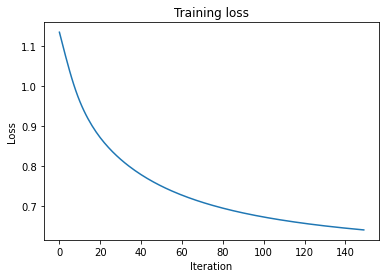

In [16]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [17]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)
probs = nn.forward(x_test)
preds = np.argmax(probs, axis=1)

y_test_map = np.where(y_test == 7, 2, y_test)
acc = np.average(preds == y_test_map)
#############################

print(acc)

0.9708347301374455
